<a href="https://colab.research.google.com/github/EZagoruyko/Medical-Records/blob/main/MedRecords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Датасет: Medical Transcriptions, источник: https://www.kaggle.com/datasets/tboyle10/medicaltranscriptions

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df = pd.read_csv('/content/sample_data/mtsamples.csv', engine='python')
df.reset_index()
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [122]:
df.shape

(4999, 5)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
 4   keywords           3931 non-null   object
dtypes: object(5)
memory usage: 195.4+ KB


In [124]:
cols_null_percent = df.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

keywords         21.364273
transcription     0.660132
dtype: float64

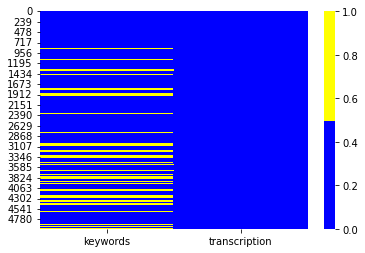

In [125]:
colors = ['blue', 'yellow'] 
fig = plt.figure()
cols = cols_with_null.index
ax = sns.heatmap(
    df[cols].isnull(),
    cmap=sns.color_palette(colors),
)

In [126]:
df['age'] = ''
df['sex'] = ''
df.head()

,description,medical_specialty,sample_name,transcription,keywords,age,sex
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",,
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",,
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...",,
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",,
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",,


In [127]:
for i in range(df.shape[0]):
  word_list = str(df['transcription'][i]).split()
  if 'female' in word_list:
    df['sex'][i] = 'female'
  if 'male' in word_list:
    df['sex'][i] = 'male' 

df.head()

,description,medical_specialty,sample_name,transcription,keywords,age,sex
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",,female
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",,
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...",,
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",,
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",,


In [134]:
for i in range(df.shape[0]):
  word_list = str(df['transcription'][i]).split()
  for word in word_list:
    if word.find('year') != -1:
      num = str()
      for char in word:
        if char.isdigit():
          num = num + char
          df['age'][i] = num


df.tail()


,description,medical_specialty,sample_name,transcription,keywords,age,sex
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN,50,female
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun...",34,
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN,42,female
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN,5,male
4998,"Acute allergic reaction, etiology uncertain, ...",Allergy / Immunology,Allergy Evaluation Consult,"HISTORY: , A 34-year-old male presents today s...",NaN,34,male


In [136]:
pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [166]:
df.head()

,description,medical_specialty,sample_name,transcription,keywords,age,sex
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",23,female
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",34,
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...",34,
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",34,
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",34,


In [174]:
from keybert import KeyBERT

for i in range(df.shape[0]):
  if df['keywords'][i] is np.nan:
    doc = df['transcription'][i]
    kw_model = KeyBERT()
    keywords = kw_model.extract_keywords(doc)
    lst = []
    for elem in keywords:
      lst.append(elem[0])
      kw = ' '.join(lst)
      df['keywords'][i] = kw

df.tail(20)


,description,medical_specialty,sample_name,transcription,keywords,age,sex
4979,Patient scheduled for laparoscopic gastric by...,Bariatrics,Gastric Bypass Discussion - 2,"HISTORY: , The patient is scheduled for laparo...","bariatrics, medifast, laparoscopic gastric byp...",33,
4980,Evaluation for elective surgical weight loss ...,Bariatrics,Bariatric Consult - Surgical Weight Loss - 1,"PAST MEDICAL HISTORY: , She has a history of h...","bariatrics, elective surgical weight loss, sur...",34,female
4981,"The patient died of a pulmonary embolism, the...",Autopsy,Autopsy - 8,"SUMMARY OF CLINICAL HISTORY:, The patient was...",tachycardia defibrillation bradycardia cardiac...,35,male
4982,Evaluation for bariatric surgery.,Bariatrics,Bariatric Consult - Surgical Weight Loss - 3,"PAST MEDICAL HISTORY: , Her medical conditions...","bariatrics, evaluation for bariatric surgery, ...",54,
4983,Autopsy - Homicide - evidence of exsanguinati...,Autopsy,Autopsy - 5,"MANNER OF DEATH: , Homicide.,CAUSE OF DEATH:,",homicide manner death cause,34,
4984,Patient suffered from morbid obesity for many...,Bariatrics,Discharge Summary - Gastric Bypass,"ADMISSION DIAGNOSIS:, Morbid obesity. BMI is...","bariatrics, laparoscopic gastric bypass, gastr...",27,
4985,Patient presented to the Bariatric Surgery Se...,Bariatrics,Bariatric Consult - Surgical Weight Loss - 4,"HISTORY OF PRESENT ILLNESS:, Ms. A is a 55-ye...","bariatrics, jenny craig, medifast, nutrisystem...",55,female
4986,Autopsy of a white female who died of acute c...,Autopsy,Autopsy - 2,"CLOTHING: , The body is clad in a light green ...",mortis postmortem scalp necrosis hair,34,
4987,"Multiple sharp force injuries, involving ches...",Autopsy,Autopsy - 6,"ANATOMICAL SUMMARY,1. Sharp force wound of nec...",anatomic anatomy anatomical subcutaneous wounds,34,male
4988,Autopsy - Homicide - Blunt force cranial trauma,Autopsy,Autopsy - 1,"EXTERNAL EXAMINATION - SUMMARY,The body is pre...",abdomen anatomic body autopsy pelvis,34,female


In [176]:
df['keywords'].isnull().sum()

0

In [178]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [182]:
le = LabelEncoder()
le.fit(df['medical_specialty'])
df['medical_specialty_le']=le.transform(df['medical_specialty'])
df

,description,medical_specialty,sample_name,transcription,keywords,age,sex,medical_specialty_le
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",23,female,0
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",34,,2
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...",34,,2
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",34,,3
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",34,,3
...,...,...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",sinusitis sinuses sinus nasal rhinitis,50,female,0
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun...",34,,0
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",asthma allergies menses symptoms allergic,42,female,0
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",asthma pneumonia allergies wheezing coughing,5,male,0


In [188]:
df['sample_name'].nunique() # очень много уникальных значений, не думаю, что кластеризация имеет смысл

2377